# Import Libraries & Set Up
---

In [1]:
import warnings
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bnlearn as bn
from pgmpy.global_vars import logger
from utils import *  # Helper functions for Gaussian cross-validation

warnings.filterwarnings('ignore')
logger.setLevel(logging.ERROR)
logging.getLogger('seaborn').setLevel(logging.ERROR)
logging.getLogger('matplotlib').setLevel(logging.ERROR)
logging.getLogger('pandas').setLevel(logging.ERROR)

palette = ['#800080', '#8A2BE2', '#FF69B4', '#DA70D6', '#9370DB', '#DDA0DD', '#BA55D3']
gradient_palette = sns.light_palette('#620080', as_cmap=True)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
sns.set_theme(style="whitegrid", palette=palette)

# Dementia
---

Let's import the processed dataset.

In [2]:
dementia_df = pd.read_csv('data/dementia_data_processed.csv')

## Learning Structure & Parameters with Cross-Validation
---

Now we will explore the process of structure learning and parameter learning for Bayesian Networks (BNs) using the provided dataset. We will evaluate multiple structure learning methods, perform parameter learning, and assess the results using cross-validation.

Our goals are:
1. To understand the structure of the data using various structure learning algorithms.
2. To learn the parameters of the best structure.
3. To evaluate the performance of each method through cross-validation.

The methods we will use:
1. Hill Climbing (HC) with BDeu scoring
2. PC Algorithm

We will then evaluate each method's performance and compare the results.

### Cross-Validation
---


In utils we have defined a function for cross validation, and we can run for each different type of model we want to test to see which one gets the best results.


In [3]:
metrics = {}
confusion = {}

#### BDeu Hill Climbing
---

In [4]:
structure_kwargs_hc = {'methodtype': 'hc'}

In [5]:
metrics_hc, confusion_hc = gaussian_cross_validation(dementia_df, 'Group', structure_kwargs=structure_kwargs_hc)


Fold 1/5
Using Hill Climbing with BDEU Score for structure learning.


  0%|          | 0/1000000 [00:00<?, ?it/s]


Fold 2/5
Using Hill Climbing with BDEU Score for structure learning.


  0%|          | 0/1000000 [00:00<?, ?it/s]


Fold 3/5
Using Hill Climbing with BDEU Score for structure learning.


  0%|          | 0/1000000 [00:00<?, ?it/s]


Fold 4/5
Using Hill Climbing with BDEU Score for structure learning.


  0%|          | 0/1000000 [00:00<?, ?it/s]


Fold 5/5
Using Hill Climbing with BDEU Score for structure learning.


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [6]:
metrics['BDeu Hill Climbing'] = metrics_hc
confusion['BDeu Hill Climbing'] = confusion_hc

#### PC Algorithm
---

In [7]:
structure_kwargs_pc = {'methodtype': 'pc'}

In [8]:
metrics_pc, confusion_pc = gaussian_cross_validation(dementia_df, 'Group', structure_kwargs=structure_kwargs_pc)


Fold 1/5
Using PC Algorithm for structure learning.


  0%|          | 0/5 [00:00<?, ?it/s]


Fold 2/5
Using PC Algorithm for structure learning.


  0%|          | 0/5 [00:00<?, ?it/s]


Fold 3/5
Using PC Algorithm for structure learning.


  0%|          | 0/5 [00:00<?, ?it/s]


Fold 4/5
Using PC Algorithm for structure learning.


  0%|          | 0/5 [00:00<?, ?it/s]


Fold 5/5
Using PC Algorithm for structure learning.


  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
metrics['PC Algorithm'] = metrics_pc
confusion['PC Algorithm'] = confusion_pc

### Evaluation
---

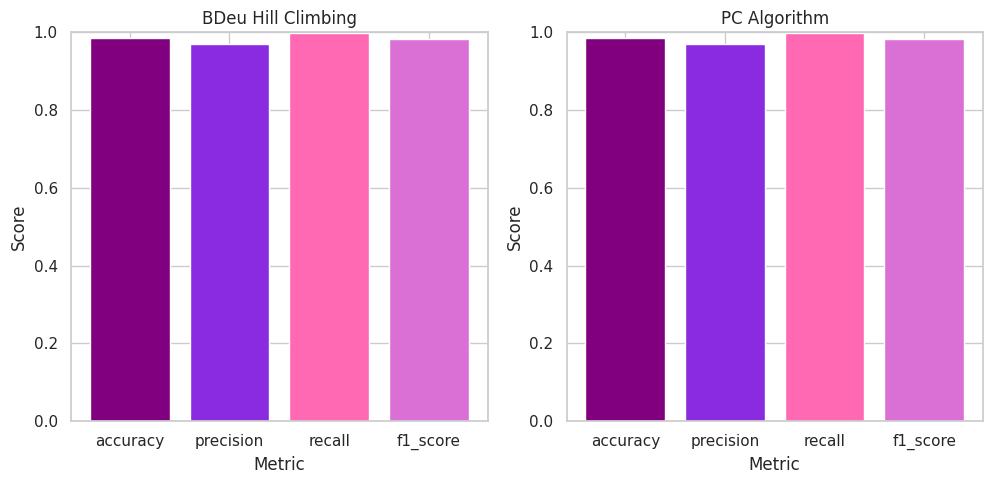

In [10]:
plot_metrics_graphs(metrics)

In [11]:
for method, metrictypes in metrics.items():
    print(f"\n{method}:")
    for metric, value in metrictypes.items():
        if metric in ['accuracy', 'precision', 'recall', 'f1_score']:
            print(f"  {metric.capitalize()}: {value * 100:.2f}%")
        else:
            print(f"  {metric.capitalize()}: {value}")


BDeu Hill Climbing:
  Accuracy: 98.50%
  Precision: 96.93%
  Recall: 99.72%
  F1_score: 98.29%

PC Algorithm:
  Accuracy: 98.50%
  Precision: 96.93%
  Recall: 99.72%
  F1_score: 98.29%


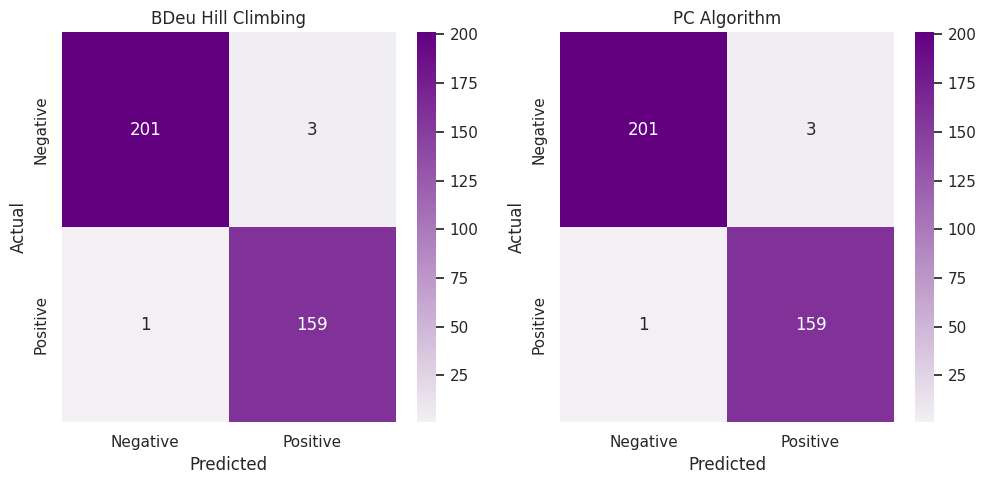

In [12]:
plot_confusion_matrices(confusion, cmap=gradient_palette)

# Parkinson's Disease
---

In [13]:
parkinsons_df = pd.read_csv('data/parkinsons_data_processed.csv')

## Learning Structure & Parameters with Cross-Validation
---

Now we will explore the process of structure learning and parameter learning for Bayesian Networks (BNs) using the provided dataset. We will evaluate multiple structure learning methods, perform parameter learning, and assess the results using cross-validation.

Our goals are:
1. To understand the structure of the data using various structure learning algorithms.
2. To learn the parameters of the best structure.
3. To evaluate the performance of each method through cross-validation.

The methods we will use:
1. Hill Climbing (HC) with BDeu scoring
2. PC Algorithm

We will then evaluate each method's performance and compare the results.

### Cross-Validation
---

In [14]:
metrics = {}
confusion = {}

#### Hill Climbing
---

In [15]:
structure_kwargs_hc = {'methodtype': 'hc'}

In [16]:
metrics_hc, confusion_hc = gaussian_cross_validation(parkinsons_df, 'Status', structure_kwargs=structure_kwargs_hc)


Fold 1/5
Using Hill Climbing with BDEU Score for structure learning.


  0%|          | 0/1000000 [00:00<?, ?it/s]


Fold 2/5
Using Hill Climbing with BDEU Score for structure learning.


  0%|          | 0/1000000 [00:00<?, ?it/s]


Fold 3/5
Using Hill Climbing with BDEU Score for structure learning.


  0%|          | 0/1000000 [00:00<?, ?it/s]


Fold 4/5
Using Hill Climbing with BDEU Score for structure learning.


  0%|          | 0/1000000 [00:00<?, ?it/s]


Fold 5/5
Using Hill Climbing with BDEU Score for structure learning.


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [17]:
metrics['BDeu Hill Climbing'] = metrics_hc
confusion['BDeu Hill Climbing'] = confusion_hc

#### PC Algorithm
---

In [18]:
structure_kwargs_pc = {'methodtype': 'pc'}

In [19]:
metrics_pc, confusion_pc = gaussian_cross_validation(parkinsons_df, 'Status', structure_kwargs=structure_kwargs_pc)


Fold 1/5
Using PC Algorithm for structure learning.


  0%|          | 0/5 [00:00<?, ?it/s]

Skipping fold 1 as 'Status' is not in the learned model.

Fold 2/5
Using PC Algorithm for structure learning.


  0%|          | 0/5 [00:00<?, ?it/s]

Skipping fold 2 as 'Status' is not in the learned model.

Fold 3/5
Using PC Algorithm for structure learning.


  0%|          | 0/5 [00:00<?, ?it/s]

Skipping fold 3 as 'Status' is not in the learned model.

Fold 4/5
Using PC Algorithm for structure learning.


  0%|          | 0/5 [00:00<?, ?it/s]

Skipping fold 4 as 'Status' is not in the learned model.

Fold 5/5
Using PC Algorithm for structure learning.


  0%|          | 0/5 [00:00<?, ?it/s]

Skipping fold 5 as 'Status' is not in the learned model.


As we can see, with this dataset the PC Algorithm doesn't seem to learn the connection to 'Status' on any fold, meaning we cannot use this algorithm.

In [20]:
#metrics['PC Algorithm'] = metrics_pc
#confusion['PC Algorithm'] = confusion_pc

## Evaluation
---

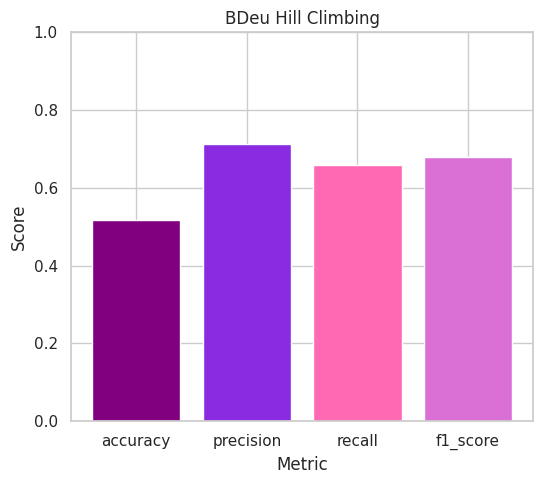

In [21]:
plot_metrics_graphs(metrics)

In [22]:
for method, metrictypes in metrics.items():
    print(f"\n{method}:")
    for metric, value in metrictypes.items():
        if metric in ['accuracy', 'precision', 'recall', 'f1_score']:
            print(f"  {metric.capitalize()}: {value * 100:.2f}%")
        else:
            print(f"  {metric.capitalize()}: {value}")


BDeu Hill Climbing:
  Accuracy: 51.70%
  Precision: 71.22%
  Recall: 65.74%
  F1_score: 67.98%


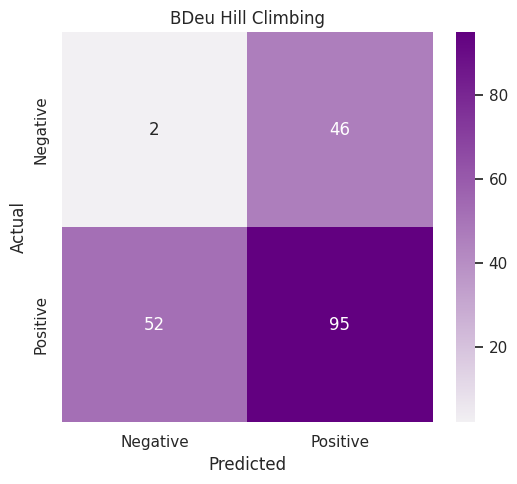

In [23]:
plot_confusion_matrices(confusion, cmap=gradient_palette)